## Playing with Complex Numbers

In [49]:
%matplotlib inline

#import all libraries 
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import math
import sympy as syms


# define a complex number 
3 + 2j

(3+2j)

In [50]:
#develop and print a complex number using called variables
a  =3
b=3
z = a + b *1j

print ('z  = ', z)
print('The type of the variable is ',type(z))

z  =  (3+3j)
The type of the variable is  <class 'complex'>


In [51]:
#multiplication with complex numbers
( 2.75 + 3.69j ) * ( 8.55 - 6.13j )

(46.1322+14.692000000000004j)

In [52]:
#power operations with complex numbers
1.4 * np.exp( 5.32j )


(0.79927078585823497-1.1494199453957457j)

In [53]:
#division with complex numbers
( 7.51 - 9.15j ) / ( 4.43 + 9.64j ) 

(-0.4880897698448308-1.0033441577191493j)

In [54]:
#define a circle 2D Z-plane
N = 360
theta = np.linspace(0,2*math.pi,360)
x1 = 1.5*np.cos(theta)
y1 = 1.5*np.sin(theta)
z1 = x1 + y1*1j

In [55]:
#map a Z-plane circle to the Xi-plane
c1=1
xi1 = z1 + (c1**2)/z1
xi1_x = np.real(xi1)
xi1_y =np.imag(xi1)

(-2.3931028558689569,
 2.3931858161439563,
 -0.93183449242169925,
 0.93183449242169936)

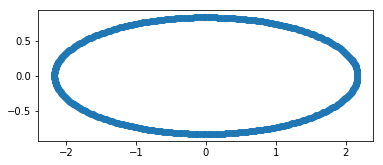

In [56]:
#plot the Z-plane circle in the Xi-plane
plt.scatter(xi1_x,xi1_y)
plt.axis('scaled')

0.0

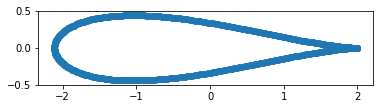

In [57]:
#define new radius size and circle location in the Z-plane
R =1.2
c2 = 1.0
x2 = R*np.cos(theta) + c2 - R
y2 = R*np.sin(theta)
z2 = x2 + y2*1j


xi2 = z2 + (c2**2)/z2

#plot altered circle in Xi-plane
plt.scatter(xi2.real,xi2.imag)
plt.axis('scaled')

theta[np.argmax(xi2.real)]

(-2.2451096708000513,
 2.2115228749667875,
 -0.17346546712593602,
 0.43616235504257161)

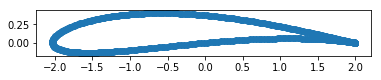

In [58]:
#redefine another Z-plane circle with different centroid coordinates and radius
dx =0.1
dy = 0.1
c3 = 1.0
R3  =  ((c3+dx)**2+dy**2)**0.5
x3 = R3*np.cos(theta) - dx
y3 = R3*np.sin(theta) +dy

z3 = x3 + y3*1j


xi3 = z3 + (c3**2)/z3
plt.scatter(xi3.real,xi3.imag)
plt.axis('scaled')

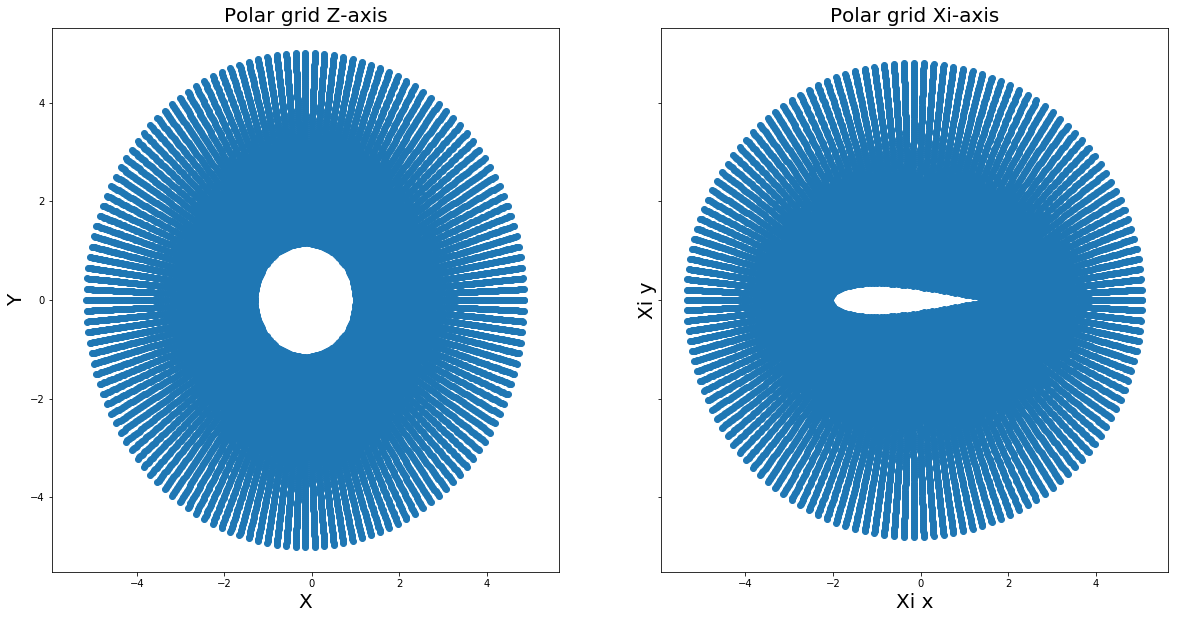

In [59]:
#define a polar grid space in Z and Xi planes using minimum and maximum radii
R  = 1.15
Rmax = 5.0

tha = np.linspace(0,2*math.pi,145)
quill = np.linspace(R,Rmax,100)
xc = -0.15
yc =0.0
[RAD,THE] = np.meshgrid(quill,tha)

#create x and y position coordinates in the meshgrid
xq = RAD*np.cos(THE) + xc
yq = RAD*np.sin(THE) +yc


#map to xi plane
zq = xq + yq*1j
cq=1
xiq = zq + (cq**2)/zq

fig, (slot1,slot2)= plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
slot1.scatter(xq,yq)
slot1.set_title('Polar grid Z-axis',fontsize=20)
slot1.set_xlabel('X',fontsize=20)
slot1.set_ylabel('Y',fontsize=20)
slot2.scatter(xiq.real,xiq.imag)
slot2.set_title('Polar grid Xi-axis',fontsize=20)
slot2.set_xlabel('Xi x',fontsize=20)
slot2.set_ylabel('Xi y',fontsize=20)

In [60]:
#set up freestream flow velocity and doublet strength based on equation we solved in earlier lessons
u_inf = 1.0

K = (R**2)*2*math.pi*u_inf

## 0 angle of attack flow with doublet

In [61]:
# define doublet functions
def get_velocity_doublet(strength, xd,yd, X,Y):
    '''
    Returns the velocity in a doublet
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xv: float
        x-coordinate of the doublet.
    yv: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        X component of doublet-based velocity.
    v: 2D Numpy array of floats
      Y component of doublet-based velocity.
    
    
    '''
    u = (-strength/(2*math.pi)*
        ((X-xd)**2-(Y-yd)**2)/
        ((X-xd)**2 + (Y-yd)**2)**2)
    v = (-strength/(2*math.pi)*2*
        (X-xd)*(Y-yd)/ ((X-xd)**2 + (Y-yd)**2)**2)
    return u,v
def get_stream_function_doublet(strength, xd,yd,X,Y):
    
    psi = -strength /(2*np.pi)*(Y-yd)/((X-xd)**2 +(Y-yd)**2)
    return psi

    

#define u, v freestream velocities and stream function without functions
u_free = u_inf*np.ones((len(tha),len(quill)),dtype=float)
v_free = np.zeros((len(tha),len(quill)),dtype =float)
psi_free = u_inf*yq

#call doublet functions using center of circle
u_doublet,v_doublet = get_velocity_doublet(K,xc,yc,xq,yq)
psi_doublet = get_stream_function_doublet(K,xc,yc,xq,yq)


#superposition to find total velocities and stream function
psi = psi_doublet + psi_free
u = u_free + u_doublet
v = v_free + v_doublet



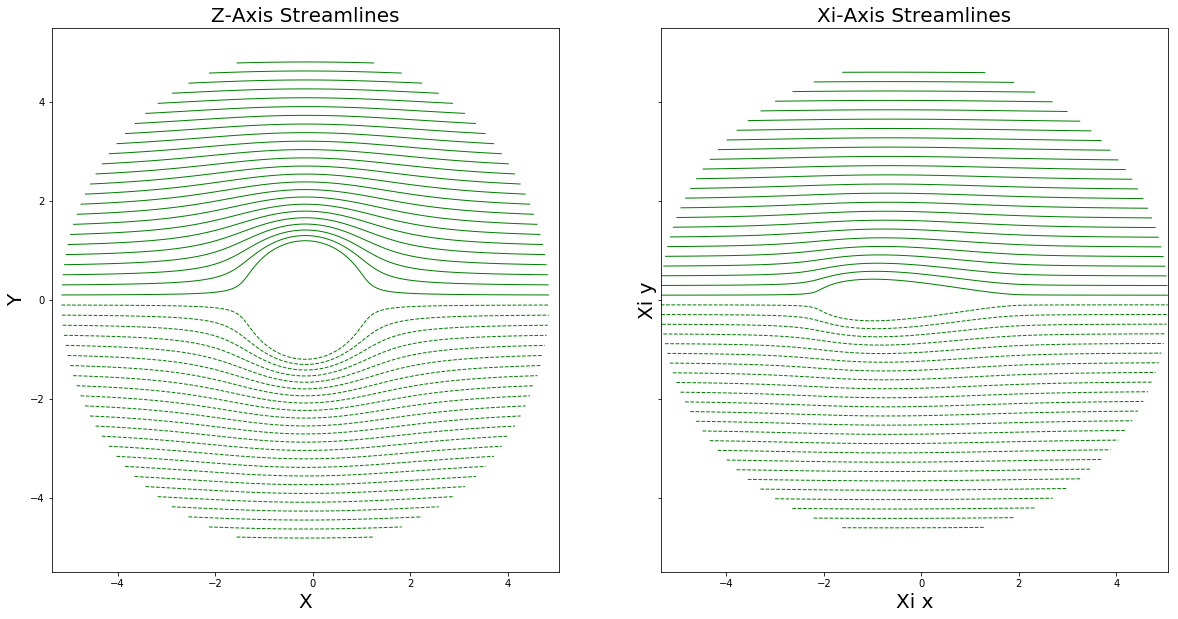

In [62]:
#plot streamlines of freestream & doublet flow in Z and Xi planes
fig, (ax1,ax2)=plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

ax1.contour(xq,yq,psi, colors='green', levels=np.linspace(np.min(psi),np.max(psi),50), linewidths=1)
ax2.contour(xiq.real,xiq.imag, psi, colors='green', levels=np.linspace(np.min(psi),np.max(psi),50),linewidths=1)

ax1.set_title('Z-Axis Streamlines',fontsize=20)
ax1.set_xlabel('X',fontsize=20)
ax1.set_ylabel('Y',fontsize=20)

ax2.set_title('Xi-Axis Streamlines',fontsize=20)
ax2.set_xlabel('Xi x',fontsize=20)
ax2.set_ylabel('Xi y',fontsize=20)

In [63]:
#define complex velocities for Z and Xi
Wz = u - v*1j
dXi_dz = 1- (1/zq)**2
Wxi = Wz/dXi_dz
uxi, vxi = Wxi.real, -Wxi.imag

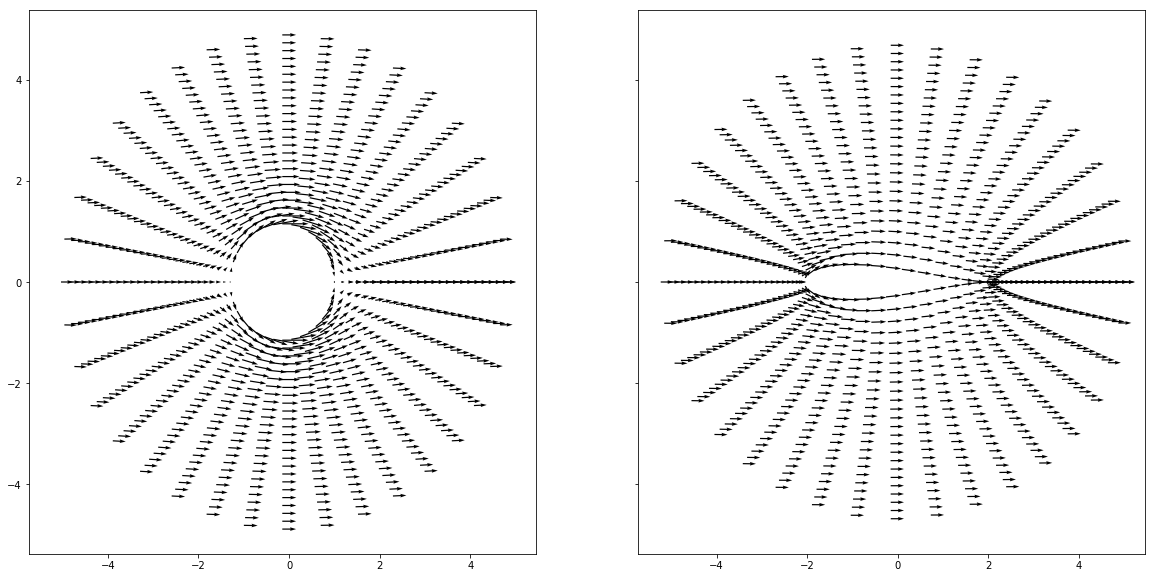

In [64]:
#plot velocity fields using every fourth arrow, units of inches, and a clean 5.5 scale
fig, (ax1,ax2)=plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
ax1.quiver(xq[::4,::4],yq[::4,::4],u[::4,::4],v[::4,::4], units='inches',scale=5.5)
ax2.quiver(xiq.real[::4,::4],xiq.imag[::4,::4],uxi[::4,::4],vxi[::4,::4], units='inches',scale=5.5)

In [65]:
#define coefficient of pressure for Z and Xi

cpz = 1 - (u**2+v**2)/u_inf**2
cpxi= 1 - (uxi**2+vxi**2)/u_inf**2

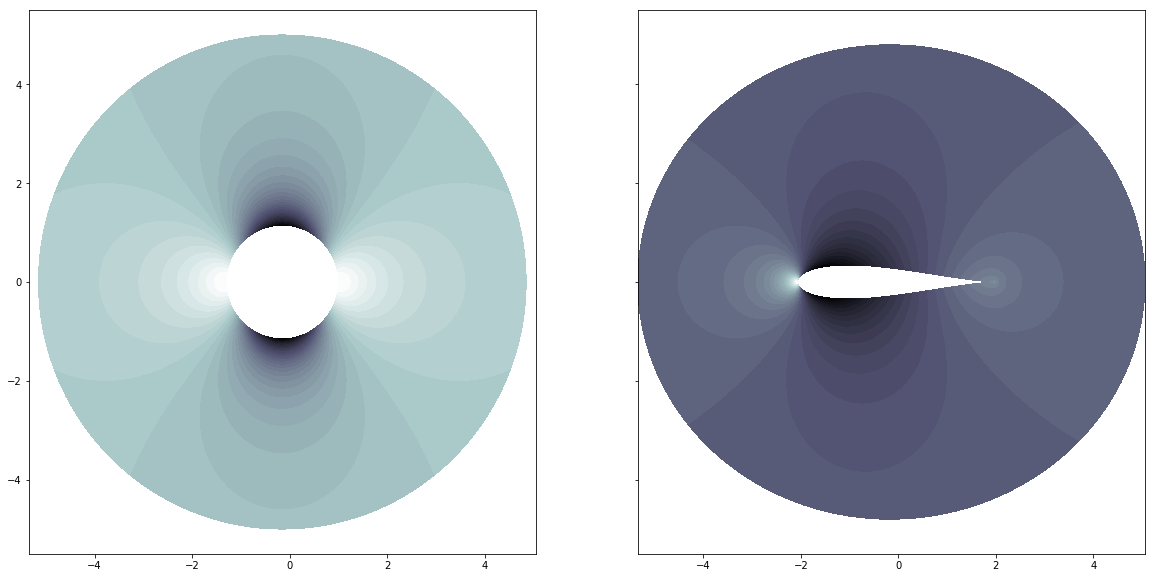

In [66]:
#plot filled contour plots of coefficients of pressure
fig, (ax1, ax2) =plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
ax1.contourf(xq,yq,cpz,levels=np.linspace(np.min(cpz),np.max(cpz),40),cmap=plt.cm.bone)

ax2.contourf(xiq.real,xiq.imag,cpxi,levels=np.linspace(np.min(cpxi),np.max(cpxi),40),cmap=plt.cm.bone)


In [67]:
#strength of doublet, 62nd airfoil velocities, minimum airfoil cp
print (K, uxi[61,0],vxi[61,0],np.min(cpxi[:,0]))

8.309512568745001 1.10633846629 0.523633349298 -0.687755674092


## 20 degree angle of attack flow with doublet

In [68]:
#set andgle of attack and redefine X,Y coordinate mapping since doublet occurs at origin instead of cylinder center
alpha= 20*np.pi/180
origin = xc + 1j * yc
z_prime = (zq-origin)*np.exp(-1j*alpha)
x_prime= z_prime.real
y_prime = z_prime.imag

x0,y0 =0.0,0.0

In [69]:
#call doublet velocities and stream function using origin, and new X,Y
up_doub,vp_doub = get_velocity_doublet(K, x0,y0, x_prime,y_prime)
psip_doub = get_stream_function_doublet(K, x0,y0,x_prime,y_prime)

In [70]:
#define freestream functions (for posterity)
def get_freestream_vel(u_inf,alpha,X,Y):
     
    u = u_inf*np.cos(alpha)*np.ones(np.shape(X),dtype=float)
    v = u_inf*np.sin(alpha)*np.ones(np.shape(X),dtype=float)
    return u,v

def get_freestream_psi(u_inf,alpha,X,Y):
     
    psi = u_inf*(Y*np.cos(alpha)-X*np.sin(alpha))
    return psi

# we define our freestream values here using an alhpa value of zero, as this will already be corrected in the modified Wz
up_free,vp_free = get_freestream_vel(u_inf,0.0,x_prime,y_prime)
psip_free = get_freestream_psi(u_inf,0.0,x_prime,y_prime)

#superposition
up = up_free + up_doub
vp= vp_free + vp_doub
psip = psip_free+psip_doub




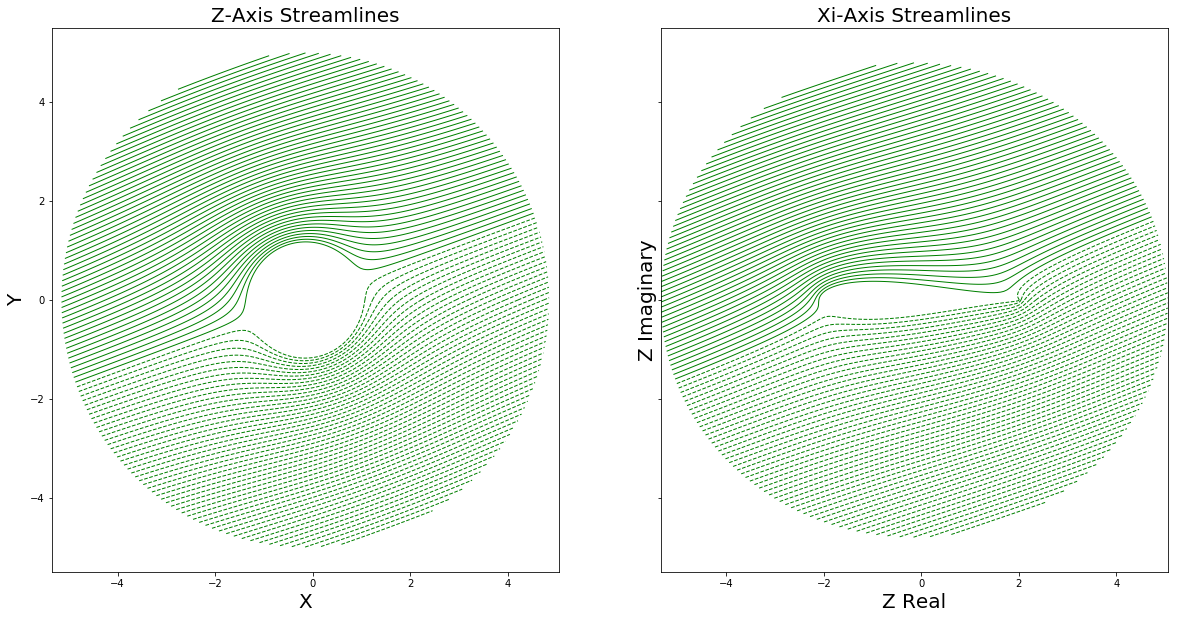

In [71]:
#plot streamlines with doublet & freestream at angle of attack
fig, (ax1,ax2)=plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

ax1.contour(xq,yq,psip, colors='green', levels=np.linspace(np.min(psi),np.max(psi),100), linewidths=1)
ax2.contour(xiq.real,xiq.imag, psip, colors='green', levels=np.linspace(np.min(psi),np.max(psi),100),linewidths=1)

ax1.set_title('Z-Axis Streamlines',fontsize=20)
ax1.set_xlabel('X',fontsize=20)
ax1.set_ylabel('Y',fontsize=20)

ax2.set_title('Xi-Axis Streamlines',fontsize=20)
ax2.set_xlabel('Z Real',fontsize=20)
ax2.set_ylabel('Z Imaginary',fontsize=20)

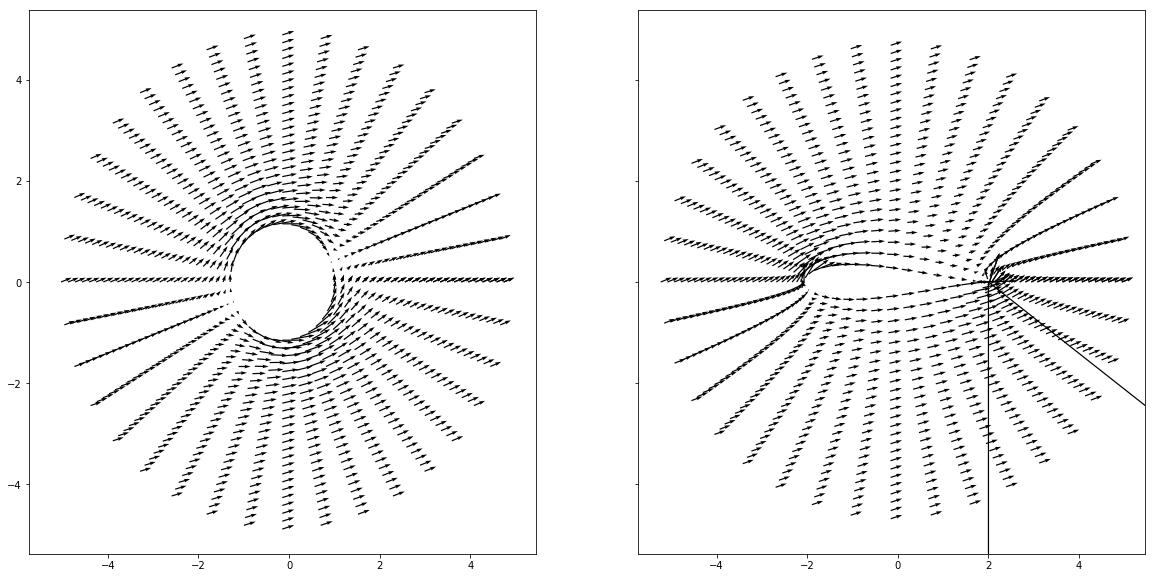

In [72]:
#define new complex velocities and velocity field
Wzp = up - vp*1j
dXi_dzp = 1- (cq/zq)**2

Wzp2 = Wzp*np.exp(-1j*alpha)
Wxip = (Wzp2/dXi_dzp)
up2,vp2= Wzp2.real,-Wzp2.imag
uxip, vxip = Wxip.real, -Wxip.imag

fig, (ax1,ax2)=plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
ax1.quiver(xq[::4,::4],yq[::4,::4],up2[::4,::4],vp2[::4,::4], units='inches',scale=5.5)
ax2.quiver(xiq.real[::4,::4],xiq.imag[::4,::4],uxip[::4,::4],vxip[::4,::4], units='inches',scale=5.5)
ax1.set_title('Z-Axis Velocity Field',fontsize=20)
ax1.set_xlabel('X',fontsize=20)
ax1.set_ylabel('Y',fontsize=20)

ax2.set_title('Xi-Axis Velocity Field',fontsize=20)
ax2.set_xlabel('Z Real',fontsize=20)
ax2.set_ylabel('Z Imaginary',fontsize=20)

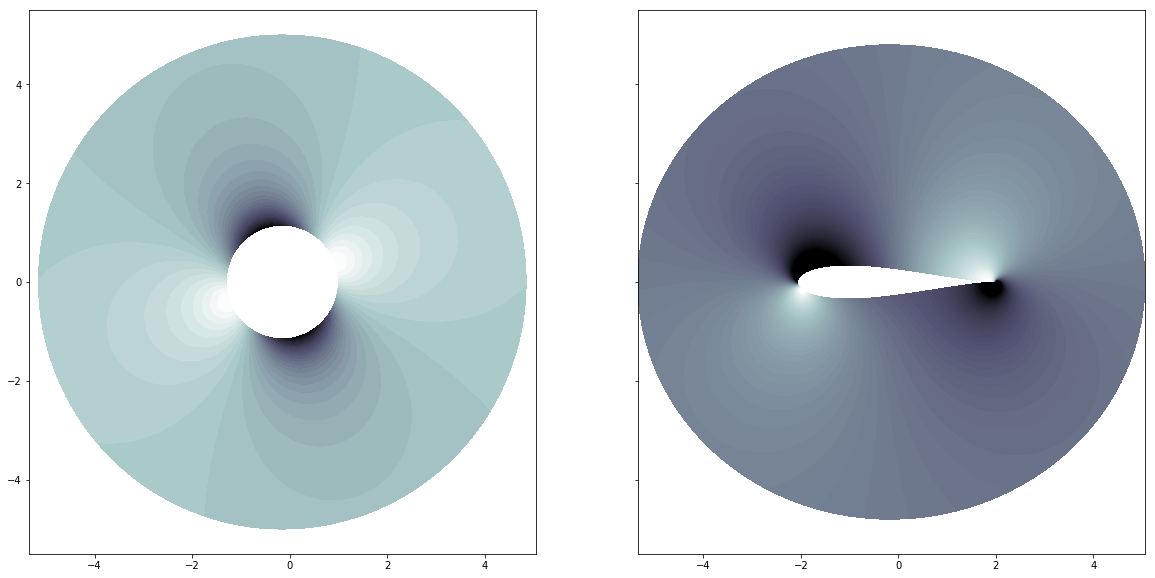

In [73]:
#coefficient of pressure with doublet and angle of attack
cpzp = 1 - (up2**2+vp2**2)/u_inf**2
cpxip= 1 - (uxip**2+vxip**2)/u_inf**2
fig, (ax1, ax2) =plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
ax1.contourf(xq,yq,cpzp,levels=np.linspace(np.min(cpzp),np.max(cpzp),40),cmap=plt.cm.bone)

ax2.contourf(xiq.real,xiq.imag,cpxip,cmap=plt.cm.bone,levels=np.linspace(-1,1,100), extend='both')
ax1.set_title('Z-Axis Cp',fontsize=20)
ax1.set_xlabel('X',fontsize=20)
ax1.set_ylabel('Y',fontsize=20)

ax2.set_title('Xi-Axis Cp',fontsize=20)
ax2.set_xlabel('Z Real',fontsize=20)
ax2.set_ylabel('Z Imaginary',fontsize=20)


In [74]:
#stagnation points, airfoil 62nd point velocities, 75th coefficient of pressure
print(np.where(np.round(uxip**2+vxip**2,2)==0),uxip[49,0],vxip[49,0],cpxip[74,0])


(array([ 8, 80]), array([0, 0])) 1.48306541501 0.0920754950073 -0.485209916437


This flow is non-physical, as is seen in the velocity field graph and streamlines field. In order for this to be accurate, the stagnation point should occur at the trailing edge.  Instead, the first stagnation point occurs at the 9th index point instead of the 1st (the trailing edge).<br>

We know that there is no drag or lift on this model considering that drag never occurs in potential flow, and based on solving the lift equaition, we would need circulation to have lift. There is no circulation, as there is no vortex, so there is no lift.

In [75]:
#define vortex strength based on previously-defined equation
strength_vor = -np.sin(-alpha)* 4 *R*math.pi

def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function in a vortex
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (4 * math.pi) * np.log((X - xv)**2 + (Y - yv)**2)
    
    return psi

def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u, v

u_vor,v_vor = get_velocity_vortex(strength_vor,x0,y0,x_prime,y_prime)
psi_vor = get_stream_function_vortex(strength_vor,x0,y0,x_prime,y_prime)

## 20 degree angle of attack with freestream, doublet, and vortex

4.9426446604 0.208483116207 -0.0319883891951 0.496694672383 (array([88]), array([0])) 4.9426446604


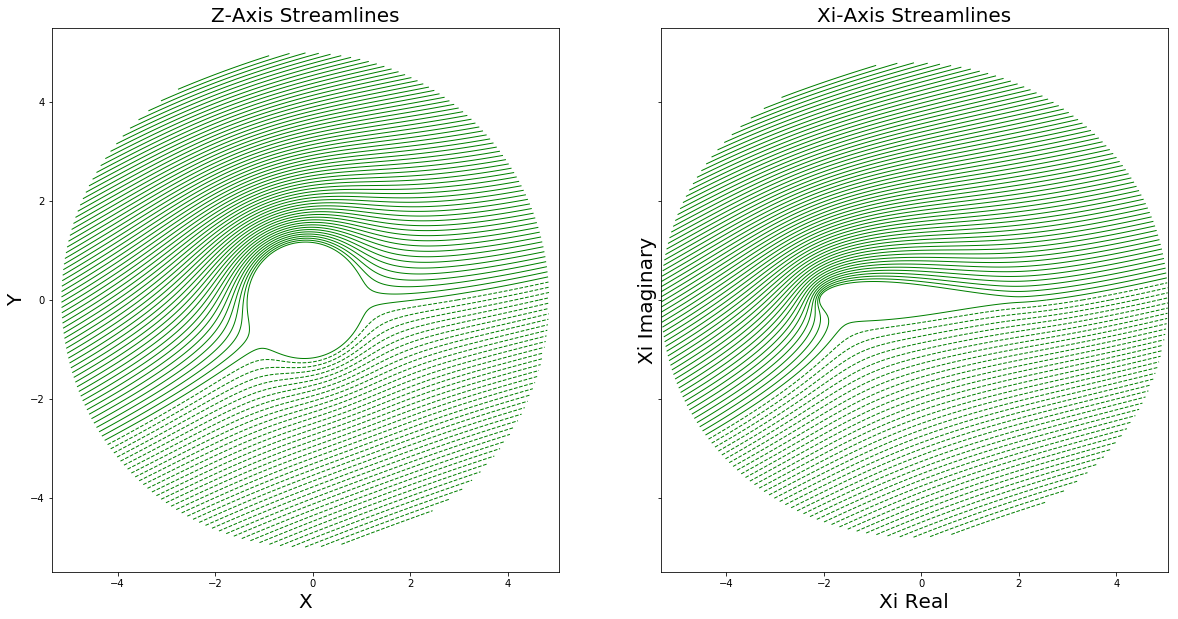

In [76]:
#superposition of velocities and psi based on freestream, doublet, and vortex
u = u_vor+up_doub+up_free
v = v_vor+vp_doub+vp_free
psi = psip_free+psip_doub+psi_vor
Wz = u - v*1j
dXi_dz = 1- (cq/zq)**2

#complex velocitie
Wz2 = Wz*np.exp(-1j*alpha)
Wxi = (Wz2/dXi_dz)
u2,v2= Wz2.real,-Wz2.imag
uxi, vxi = Wxi.real, -Wxi.imag

#coefficient of pressure
cpz = 1 - (u2**2+v2**2)/u_inf**2
cpxi= 1 - (uxi**2+vxi**2)/u_inf**2

stagn = np.where(np.round(uxi**2+vxi**2,3)==0)

fig, (ax1,ax2)=plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

ax1.contour(xq,yq,psi, colors='green', levels=np.linspace(np.min(psi),np.max(psi),100), linewidths=1)
ax2.contour(xiq.real,xiq.imag, psi, colors='green', levels=np.linspace(np.min(psi),np.max(psi),100),linewidths=1)

ax1.set_title('Z-Axis Streamlines',fontsize=20)
ax1.set_xlabel('X',fontsize=20)
ax1.set_ylabel('Y',fontsize=20)

ax2.set_title('Xi-Axis Streamlines',fontsize=20)
ax2.set_xlabel('Xi Real',fontsize=20)
ax2.set_ylabel('Xi Imaginary',fontsize=20)


#solve lift
#asume density of value 1
rho =1.0
L = rho*strength_vor*u_inf



#vortex strength, 92nd airfoil velocity, 111th airoil cp, stagnation points, lift
print(strength_vor,uxi[91,0],vxi[91,0], cpxi[110,0], stagn,L)

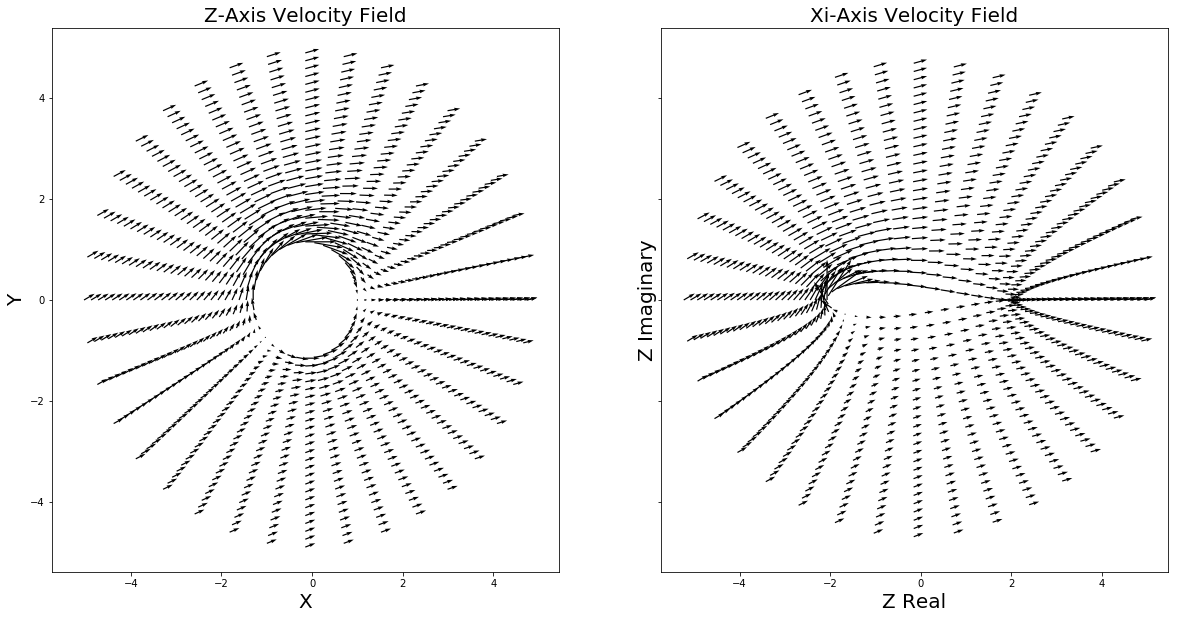

In [80]:
#plot velocity fields
fig, (ax1,ax2)=plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
ax1.quiver(xq[::4,::4],yq[::4,::4],u2[::4,::4],v2[::4,::4], units='inches',scale=6.0)
ax2.quiver(xiq.real[::4,::4],xiq.imag[::4,::4],uxi[::4,::4],vxi[::4,::4], units='inches',scale=6.0)
ax1.set_title('Z-Axis Velocity Field',fontsize=20)
ax1.set_xlabel('X',fontsize=20)
ax1.set_ylabel('Y',fontsize=20)

ax2.set_title('Xi-Axis Velocity Field',fontsize=20)
ax2.set_xlabel('Z Real',fontsize=20)
ax2.set_ylabel('Z Imaginary',fontsize=20)

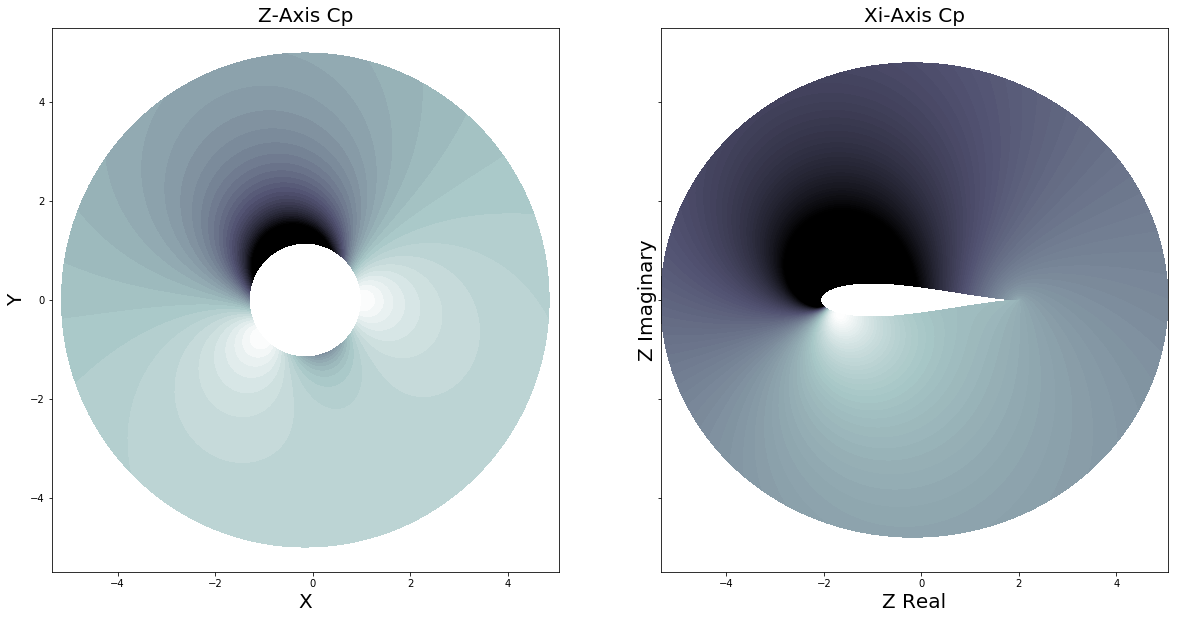

In [81]:
#plot cp maps
fig, (ax1,ax2)=plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
ax1.contourf(xq,yq,cpz,levels=np.linspace(np.min(cpzp),np.max(cpzp),40),cmap=plt.cm.bone,extend='both')

ax2.contourf(xiq.real,xiq.imag,cpxi,cmap=plt.cm.bone,levels=np.linspace(-1,1,100), extend='both')

ax1.set_title('Z-Axis Cp',fontsize=20)
ax1.set_xlabel('X',fontsize=20)
ax1.set_ylabel('Y',fontsize=20)

ax2.set_title('Xi-Axis Cp',fontsize=20)
ax2.set_xlabel('Z Real',fontsize=20)
ax2.set_ylabel('Z Imaginary',fontsize=20)

Since this is a potential flow, due to the d'almbert paradox, there is no drag.  The lift is based on density, circulation, and freestream velocity.